In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [319]:
from pandas.io.data import DataReader
# Scrapes stocks from internet

In [320]:
from datetime import datetime
from __future__ import division

### Stock Analysis of Tech Companies

In [321]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Apple, Google, Microsoft and Amazon

In [322]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
# Datetime is essentially a tuple (y,m,d,h,m,s)

In [323]:
for stock in tech_list :
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    
# globals()[X] assigns stock string as a global variable (dataframe in this case)
# DataReader reads the list of ticks from yahoo

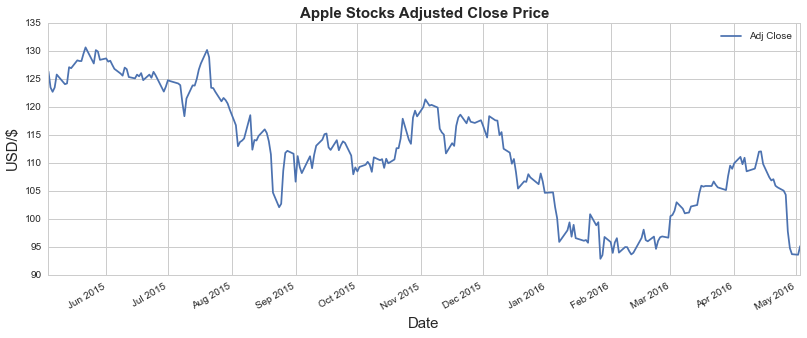

In [324]:
plt.figure(figsize=(12,5))
ax = AAPL['Adj Close'].plot(legend=True)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('USD/$', fontsize=15)

ax.set_title("Apple Stocks Adjusted Close Price", fontsize=15, weight='bold')

The adjusted close position of Apple stocks over the past year.

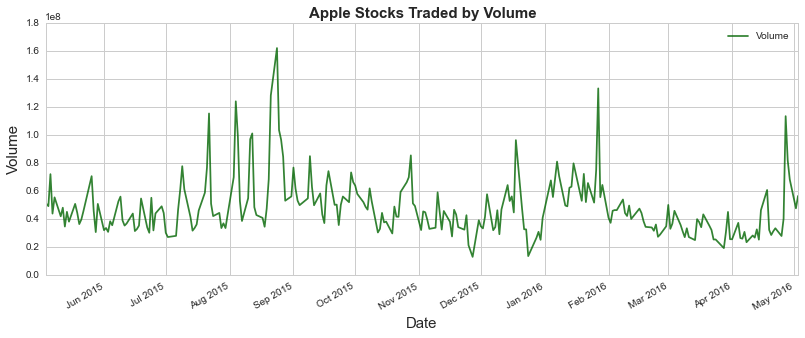

In [325]:
plt.figure(figsize=(12,5))
ax = AAPL['Volume'].plot(legend=True, color='darkgreen', alpha=0.8)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Volume', fontsize=15)

ax.set_title("Apple Stocks Traded by Volume", fontsize=15, weight='bold')

The volume of Apple stocks traded over the past year.

In [326]:
ma_day = [10, 20, 50]

for ma in ma_day :
    column_name = "MA for %d days" % ma
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)
    
# Insert a column for 10, 20 and 50 point moving averages

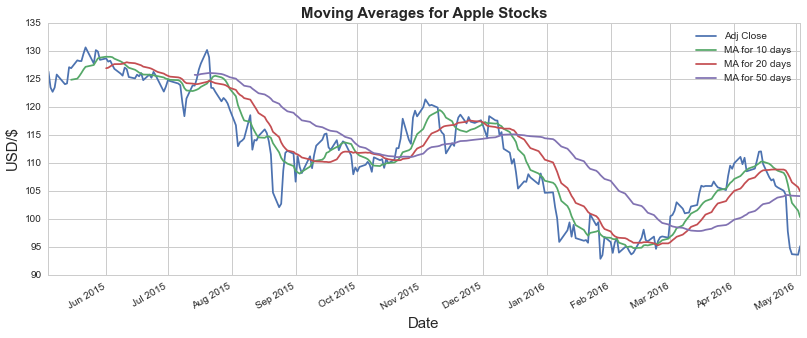

In [327]:
ax = AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(12,5))
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('USD/$', fontsize=15)

ax.set_title("Moving Averages for Apple Stocks", fontsize=15, weight='bold')

In [328]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# % change is already a pandas method

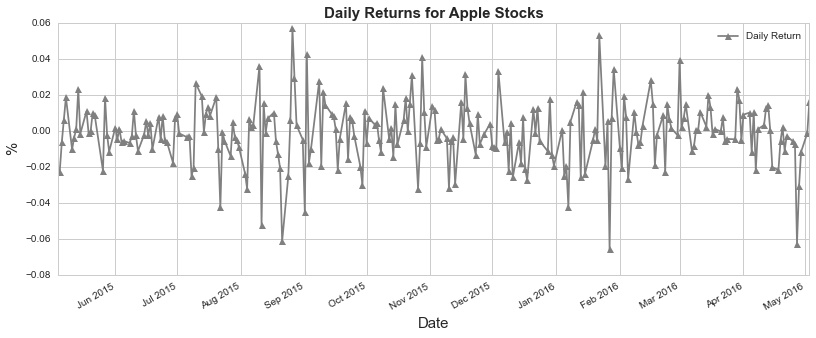

In [329]:
plt.figure(figsize=(12,5))
ax = AAPL['Daily Return'].plot( legend=True, color='grey',linestyle='-', marker='^')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('%', fontsize=15)

ax.set_title("Daily Returns for Apple Stocks", fontsize=15, weight='bold')
#ax.set(xlabel='Date', title='Fig. 4 - Daily Returns for Apple Stocks')

Daily returns as a lineplot is too messy.

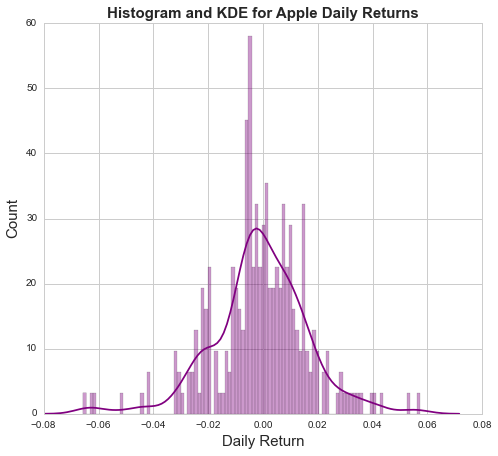

In [330]:
plt.figure(figsize=(7,7))

ax = sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')
ax.set_xlabel('Daily Return', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_title("Histogram and KDE for Apple Daily Returns", fontsize=15, weight='bold')

Daily returns as a distribution/histogram is more informative. We can see the modal value is below zero, but the distribution seems skewed in the positive direction.

In [331]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
# One dataframe for all tech_list companies, adj close data

In [332]:
tech_rets = closing_df.pct_change()

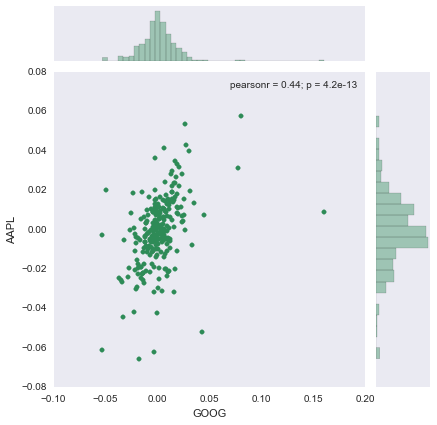

In [333]:
sns.set_style("dark")
ax = sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

A joint scatterplot for Google and Apple daily returns.

N.B. (|r| < 0.3) -> weak correlation; (0.3 < |r| < 0.5) -> medium correlation; (|r| > 0.5) -> strong correlation.

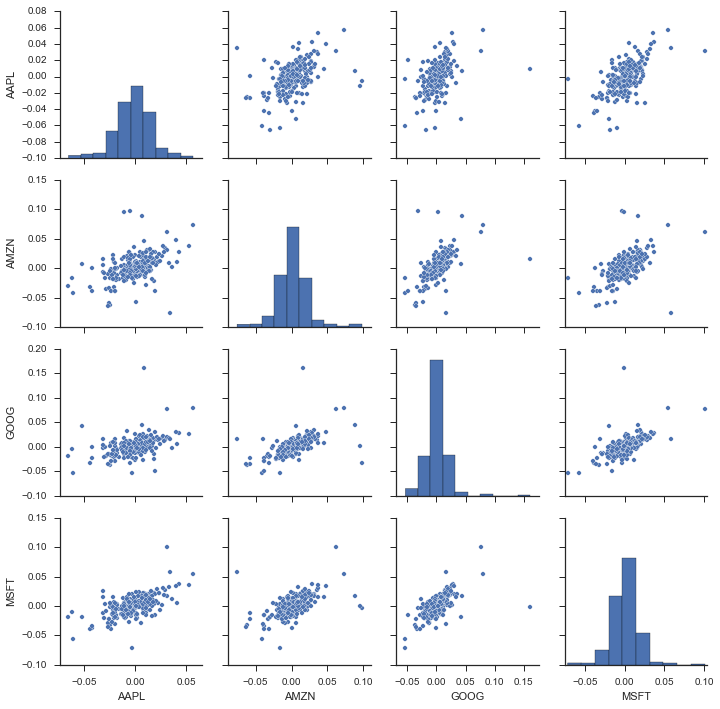

In [334]:
sns.set(style='ticks')
ax = sns.pairplot(tech_rets.dropna(), diag_kind='hist')

nplot = len(tech_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)
#ax.axes is now a matrix

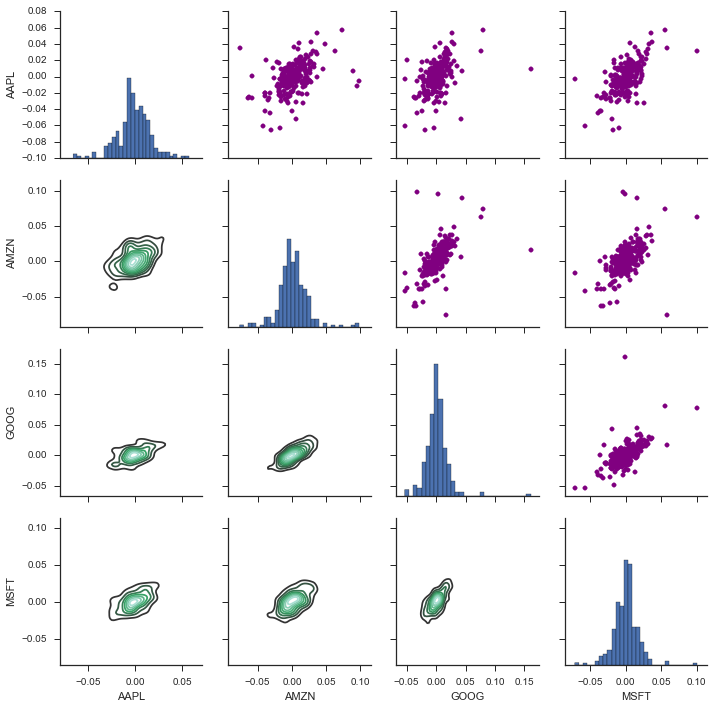

In [335]:
ax = sns.PairGrid(tech_rets.dropna())
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='hlr')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

pairplot is nice and easy scatterplots for all columns in a dataframe (diag is histogram), whilst PairGrid is more customisable. corrplot explicitly calculates the coefficients.

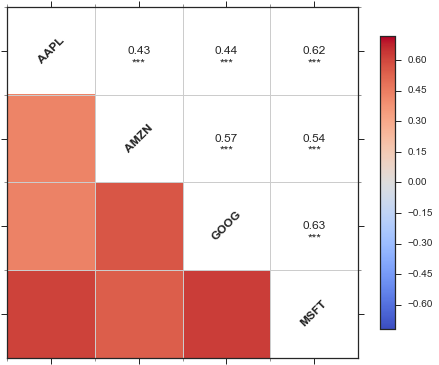

In [336]:
plt.figure(figsize=(7,7))
ax = sns.corrplot(tech_rets.dropna(), annot=True)

Apple and Microsoft have the highest degree of correlation (but all four stocks have positive medium correlation).

### Risk Analysis

Standard deviation is a good indicator of risk for a stock's behaviour.

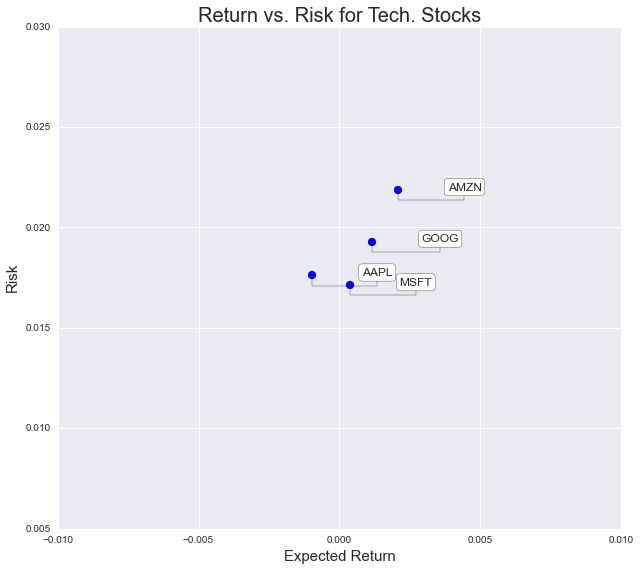

In [337]:
rets = tech_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(9,9))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Tech. Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))


We see that Amazon gives both the best average return and the highest risk. Apple has an average return of less than zero (not good!)

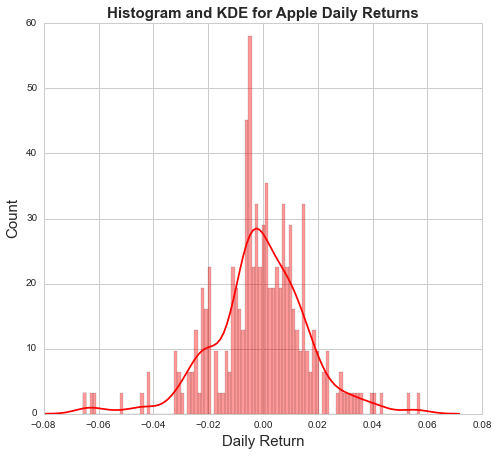

In [338]:
sns.set_style("whitegrid")

plt.figure(figsize=(7,7))
ax = sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='red')
ax.set_xlabel('Daily Return', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_title("Histogram and KDE for Apple Daily Returns", fontsize=15, weight='bold')

In [339]:
rets.quantile(0.05) # 5% Quantile

AAPL   -0.028032
AMZN   -0.032752
GOOG   -0.023431
MSFT   -0.024520
dtype: float64

In [340]:
rets.quantile(0.95) # 95% Quantile

AAPL    0.027223
AMZN    0.031655
GOOG    0.025348
MSFT    0.023139
dtype: float64

The worst 5% of results, have lost 2.8% of the Apple stock price in a day, i.e. the '5% Value at Risk' is 2.8%. On the other hand, the best 5% of results only give you a gain of 2.7%, so the distribution is skewed somewhat. As seen in the risk scatterplot, Amazon has the highest risk.

### Monte Carlo Approach

The geometric Brownian motion model:

<a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;\Delta&space;S&space;=&space;S(\mu\Delta&space;t&space;&plus;&space;\sigma\epsilon&space;\sqrt[]{\Delta&space;t})" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;\Delta&space;S&space;=&space;S(\mu\Delta&space;t&space;&plus;&space;\sigma\epsilon&space;\sqrt[]{\Delta&space;t})" title="\large \Delta S = S(\mu\Delta t + \sigma\epsilon \sqrt[]{\Delta t})" /></a>

N.B. Use https://www.codecogs.com/latex/eqneditor.php for formulae.

S is the change in share price, mu is the expected return, t is time, sigma is standard deviation of returns, epsilon is a random number. The first term is a deterministic 'drift' term, the second is a stochastic 'shock' term.

If we simulate many final states of the system and put the results into bins, we can create a probability distribution function to give us an idea of what the stock price could be in a year. This simulation is of future Google performance. 

In [341]:
days=365
dt=1/days # dt is one day
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [342]:
def stock_monte_carlo(start_price, days, mu, sigma) :
    
    price=np.zeros(days)
    price[0] = start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1, days) :
        drift[x]=mu*dt
        shock[x]=np.random.normal(loc=0.0, scale=sigma*np.sqrt(dt))
        #  = sigma*np.sqrt(dt)*np.random.randn()
        price[x] = price[x-1] + price[x-1]*(drift[x] + shock[x])
        
    return price

In [343]:
start_price = GOOG.ix[0][0]
start_price

538.53002900000001

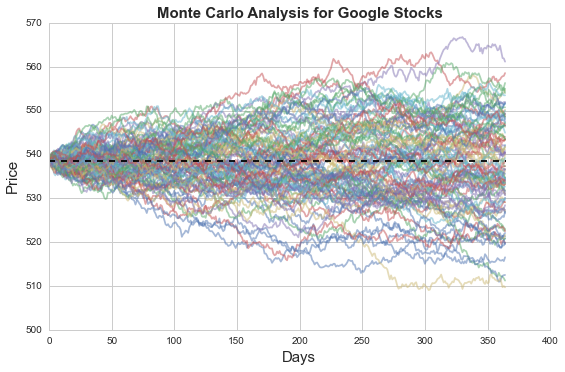

In [344]:
sns.set_style("whitegrid")

for i in range(100) :
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), alpha=0.5)
plt.plot([0, 365], [start_price, start_price], 'k--')
plt.xlabel("Days", fontsize=15)
plt.ylabel("Price", fontsize=15)

plt.title("Monte Carlo Analysis for Google Stocks", fontsize=15, weight='bold')

In [345]:
runs = 10000
simulations=np.zeros(runs)

for run in range(runs) :
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]


A bigger simulation to create a histogram and KDE for our stock price distribution.

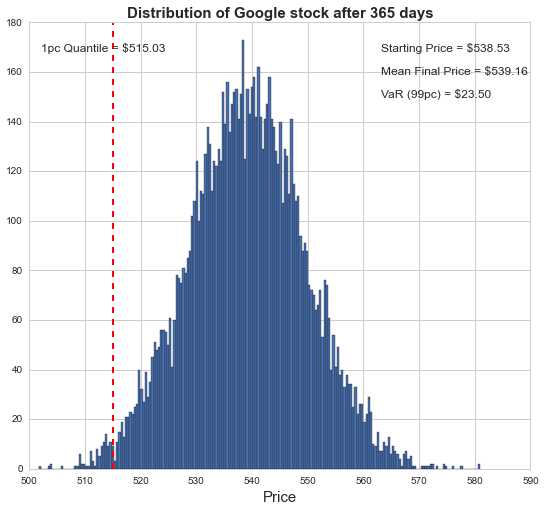

In [346]:
q = np.percentile(simulations, 1)

plt.figure(figsize=(8,8))
plt.hist(simulations, bins=200)

plt.figtext(0.69, 0.85, s="Starting Price = $%.2f" % start_price)
plt.figtext(0.69, 0.81, s="Mean Final Price = $%.2f" % simulations.mean())
plt.figtext(0.69, 0.77, s="VaR (99pc) = $%.2f" % (start_price-q))
plt.figtext(0.10, 0.85, s="1pc Quantile = $%.2f" % q)

plt.axvline(x=q, linewidth=2, color='r', linestyle='--')
#plt.axvline(x=start_price, linewidth=2, color='w', linestyle='--')

plt.xlabel("Price", fontsize=15)
plt.title("Distribution of Google stock after %d days" % days, weight='bold', fontsize=15)

In [347]:
mu, sigma

(0.0011609273915942921, 0.01929230210547685)

The expected return is tiny (0.12%) so we should expect a very small drift in the mean. The standard deviation is 1.93%, about an order of magnitude larger. 

The VaR (99%) is then $22.56, for each stock you buy we predict that if things go badly, that is the most you can lose... (99% of the time).

### Stock Analysis of Other Sectors